In [2]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('C:\\Mammograms'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Mammograms\BreaKHis 400X\test\benign\SOB_B_A-14-22549AB-400-001.png
C:\Mammograms\BreaKHis 400X\test\benign\SOB_B_A-14-22549AB-400-003.png
C:\Mammograms\BreaKHis 400X\test\benign\SOB_B_A-14-22549AB-400-004.png
C:\Mammograms\BreaKHis 400X\test\benign\SOB_B_A-14-22549AB-400-005.png
C:\Mammograms\BreaKHis 400X\test\benign\SOB_B_A-14-22549AB-400-007.png
C:\Mammograms\BreaKHis 400X\test\benign\SOB_B_A-14-22549AB-400-011.png
C:\Mammograms\BreaKHis 400X\test\benign\SOB_B_A-14-22549AB-400-015.png
C:\Mammograms\BreaKHis 400X\test\benign\SOB_B_A-14-22549AB-400-019.png
C:\Mammograms\BreaKHis 400X\test\benign\SOB_B_A-14-22549AB-400-025.png
C:\Mammograms\BreaKHis 400X\test\benign\SOB_B_A-14-22549AB-400-027.png
C:\Mammograms\BreaKHis 400X\test\benign\SOB_B_A-14-22549AB-400-028.png
C:\Mammograms\BreaKHis 400X\test\benign\SOB_B_A-14-22549CD-400-004.png
C:\Mammograms\BreaKHis 400X\test\benign\SOB_B_A-14-22549CD-400-006.png
C:\Mammograms\BreaKHis 400X\test\benign\SOB_B_A-14-22549CD-400-009.png
C:\Mam

In [3]:
! pip install tensorflow 

In [4]:
! pip install keras

In [5]:
! pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 495.5 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 751.6 kB/s eta 0:00:01
   --------------------------- ------------ 204.8/294.9 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.5 MB/s eta 0:00:00


In [8]:
import json
import math
import os

import cv2
from PIL import Image
import numpy as np
from keras import layers
import tensorflow
from tensorflow.keras.applications import resnet
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications import DenseNet201, InceptionV3, NASNetLarge, InceptionResNetV2, NASNetMobile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
from tqdm import tqdm
import tensorflow as tf
from keras import backend as K
import gc
from functools import partial
from sklearn import metrics
from collections import Counter
import json
import itertools

In [9]:
import os
for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/data (1)'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

def Dataset_loader(DIR, RESIZE, sigmaX=10):
    IMG = []
    read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
    for IMAGE_NAME in tqdm(os.listdir(DIR)):
        PATH = os.path.join(DIR,IMAGE_NAME)
        _, ftype = os.path.splitext(PATH)
        if ftype == ".png":
            img = read(PATH)

            img = cv2.resize(img, (RESIZE,RESIZE))

            IMG.append(np.array(img))
    return IMG

100%|████████████████████████████████████████████████████████████████████████████████| 369/369 [00:11<00:00, 33.10it/s]


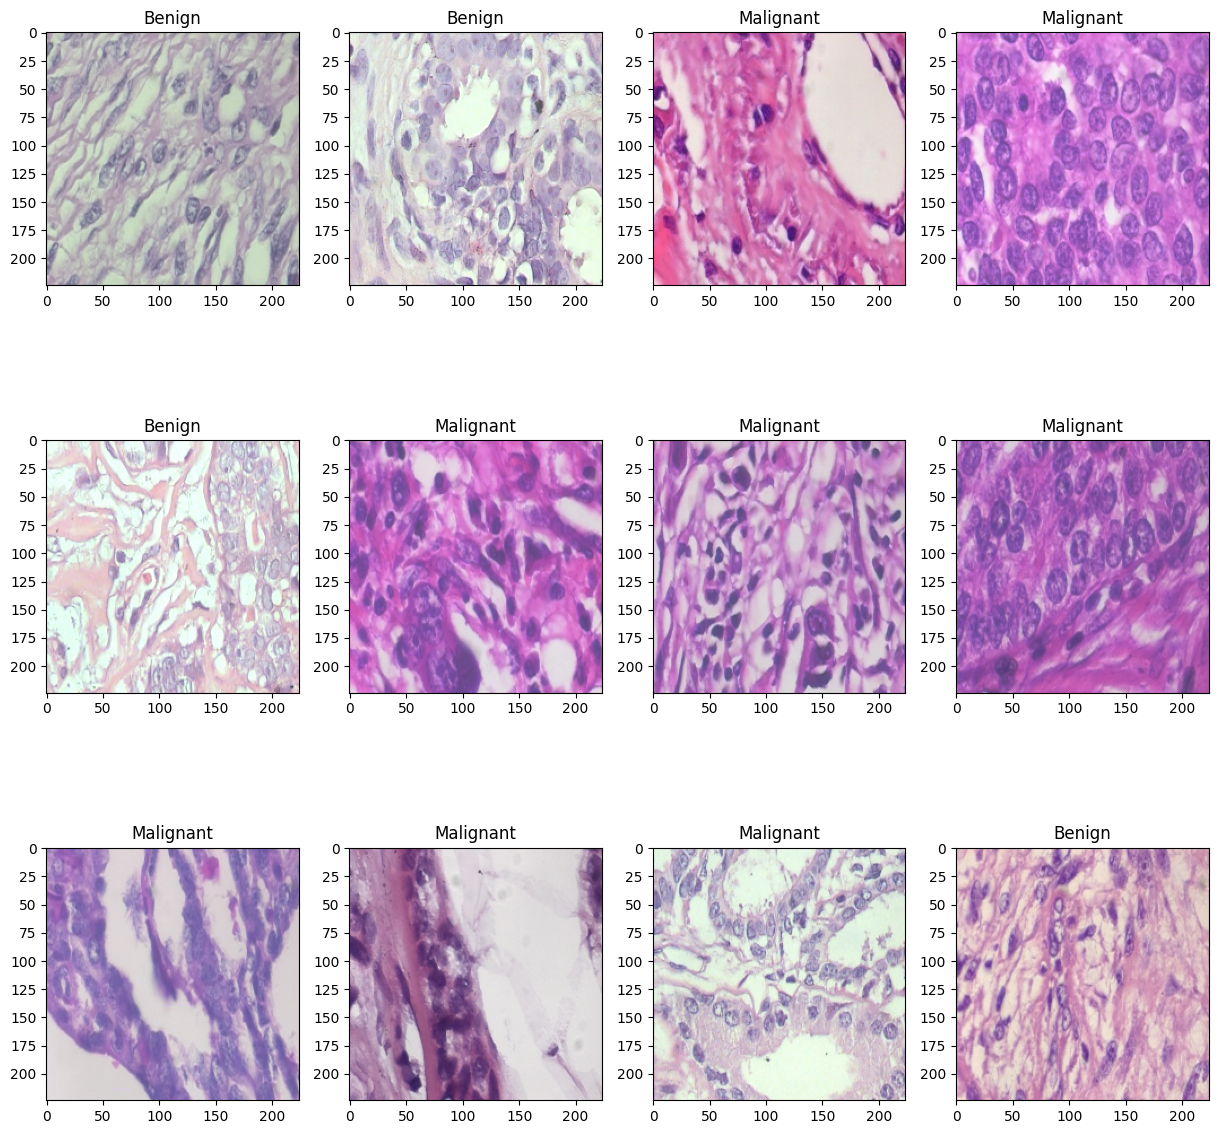

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet201 (Functional)             │ ?                           │      18,321,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,321,984 (69.89 MB)

 Trainable params: 18,092,928 (69.02 MB)

 Non-trainable params: 229,056 (894.75 KB)

In [14]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, BatchNormalization, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import gc
import os




benign_train = np.array(Dataset_loader('C:\\Mammograms\\BreaKHis 400X\\train\\benign', 224))
malign_train = np.array(Dataset_loader('C:\\Mammograms\\BreaKHis 400X\\train\\malignant', 224))
benign_test = np.array(Dataset_loader('C:\\Mammograms\\BreaKHis 400X\\test\\benign', 224))
malign_test = np.array(Dataset_loader('C:\\Mammograms\\BreaKHis 400X\\test\\malignant', 224))

benign_train_label = np.zeros(len(benign_train))
malign_train_label = np.ones(len(malign_train))
benign_test_label = np.zeros(len(benign_test))
malign_test_label = np.ones(len(malign_test))

X_train = np.concatenate((benign_train, malign_train), axis=0)
Y_train = np.concatenate((benign_train_label, malign_train_label), axis=0)
X_test = np.concatenate((benign_test, malign_test), axis=0)
Y_test = np.concatenate((benign_test_label, malign_test_label), axis=0)

X_train, Y_train = shuffle(X_train, Y_train)
X_test, Y_test = shuffle(X_test, Y_test)

Y_train = to_categorical(Y_train, num_classes=2)
Y_test = to_categorical(Y_test, num_classes=2)

x_train, x_val, y_train, y_val = train_test_split(
    X_train, Y_train,
    test_size=0.2,
    random_state=11
)


plt.figure(figsize=(15, 15))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(x_train[i])
    if np.argmax(y_train[i]) == 0:
        plt.title('Benign')
    else:
        plt.title('Malignant')
plt.show()


BATCH_SIZE = 16
train_generator = ImageDataGenerator(
    zoom_range=0.2,  
    rotation_range=45,
    horizontal_flip=True,  
    vertical_flip=True,  
)

train_flow = train_generator.flow(x_train, y_train, batch_size=BATCH_SIZE)


def build_model(backbone, lr=1e-4):
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(2, activation='softmax'))

    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(learning_rate=lr),
        metrics=['accuracy']
    )

    return model


K.clear_session()
gc.collect()


resnet = DenseNet201(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)


model = build_model(resnet, lr=1e-4)
model.summary()
